# Importing necessary librarires and DataSet

In [377]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

In [378]:
df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [379]:
df.shape

(418, 12)

### Checking for Null Values

In [380]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# DataSet Cleaning

In [381]:
df['Fare'] = df['Fare'].fillna(method = 'ffill')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Filling null values with the mean 

In [382]:
df.loc[df['Sex'] == 'female', 'Age'] = df[df['Sex'] == 'female'][['Age']].fillna(round(df[df['Sex'] == 'female'][['Age']].mean(), 2))
df.loc[df['Sex'] == 'male', 'Age'] = df[df['Sex'] == 'male'][['Age']].fillna(round(df[df['Sex'] == 'male'][['Age']].mean(), 2))


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Dropping Unwanted Coloumns

In [384]:
df.drop(columns = ['Cabin', 'Name', 'Ticket'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


## Replacing Discrete Values with numbers

In [385]:
df.loc[df['Sex'] == 'female', 'Sex'] = 0
df.loc[df['Sex'] == 'male', 'Sex'] = 1

df['Sex'] = df['Sex'].astype(int)

In [386]:
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 0
df.loc[df['Embarked'] == 'S', 'Embarked'] = 1
df.loc[df['Embarked'] == 'C', 'Embarked'] = 2

df['Embarked'] = df['Embarked'].astype(int)

### Splitting Dataset in X and Y

In [387]:
X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df['Survived']
print(X.shape)
print(Y.shape)

(418, 8)
(418,)


## Data Visualization

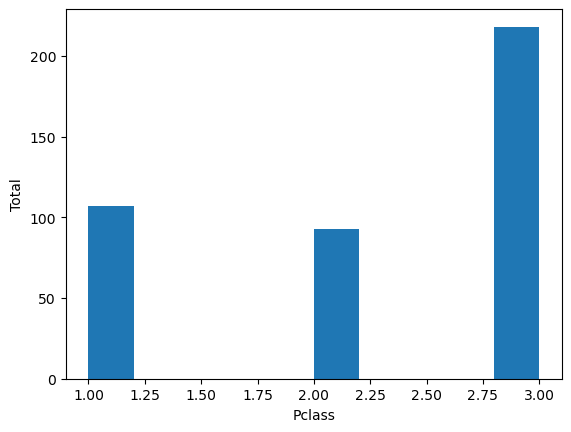

In [388]:
plt.hist(df['Pclass'], bins = 10 )
plt.xlabel('Pclass')
plt.ylabel('Total')
plt.show()

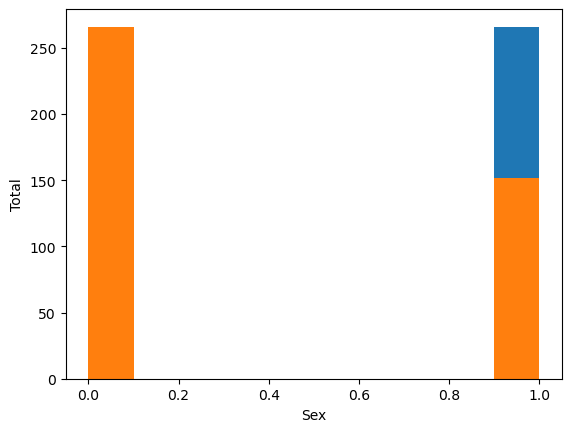

In [389]:
plt.hist(df['Sex'],  bins = 10)
plt.hist(df['Survived'],  bins = 10)
plt.xlabel("Sex")
plt.ylabel("Total")
plt.show()

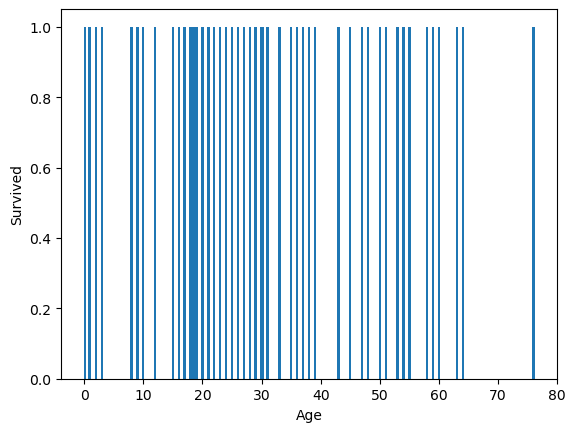

In [390]:
#plt.bar(df['Survived'], df['Survived'] ,width = 0.5)
plt.bar(df['Age'], df['Survived'], width = 0.4)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

## Splitting Data into training and testing data frames

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [392]:
print("X_train Set & Y_train Set", X_train.shape, y_train.shape)
print("X_test Set & Y_test Set", X_test.shape, y_test.shape)

X_train Set & Y_train Set (334, 8) (334,)
X_test Set & Y_test Set (84, 8) (84,)


### Training Set Normalization to avoid biasness

In [393]:
x_train_norm = StandardScaler().fit(X_train).transform(X_train)
x_train_norm

array([[ 0.57755825,  0.86150174,  0.71506099, ...,  0.68189007,
        -0.37660894, -0.2622706 ],
       [-1.29070651, -0.32261999, -1.39848211, ...,  0.68189007,
        -0.20808171, -0.2622706 ],
       [ 0.7570422 ,  0.86150174,  0.71506099, ..., -0.40263985,
        -0.47000682, -0.2622706 ],
       ...,
       [-1.59256588, -0.32261999, -1.39848211, ..., -0.40263985,
        -0.12183961,  1.4553447 ],
       [-0.69514613,  0.86150174, -1.39848211, ...,  0.68189007,
        -0.33413459, -0.2622706 ],
       [ 0.44702447,  0.86150174,  0.71506099, ..., -0.40263985,
        -0.4840133 , -0.2622706 ]])

# Model Selection, Training & Initialization

In [394]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train_norm, y_train)

LogisticRegression(solver='liblinear')

### Testing Set Normalization to avoid biasness

In [395]:
x_test_norm = StandardScaler().fit(X_test).transform(X_test)
x_test_norm

array([[ 1.42469213, -0.28843487, -1.07417231,  0.0148058 , -0.52571732,
        -0.40356716, -0.32262683, -0.10557361],
       [-0.42410621,  0.92299159,  0.93094934, -1.30592417,  2.93783211,
         1.2914149 , -0.14822306, -0.10557361],
       [-1.37517074,  0.92299159,  0.93094934, -0.03875714, -0.52571732,
        -0.40356716, -0.54509132, -1.87921024],
       [-0.9040827 , -1.49986134, -1.07417231,  0.89529245,  0.34017003,
        -0.40356716,  0.25564151,  1.66806302],
       [-0.13078725,  0.92299159,  0.93094934, -1.01242862,  1.20605739,
        -0.40356716, -0.54005439, -0.10557361],
       [-0.77964435, -1.49986134, -1.07417231,  2.3627702 ,  0.34017003,
        -0.40356716,  3.04841041, -0.10557361],
       [ 0.30474698, -1.49986134,  0.93094934,  2.43614408,  0.34017003,
        -0.40356716,  0.58821837,  1.66806302],
       [-0.53076765, -1.49986134,  0.93094934,  2.21602242,  0.34017003,
         2.13890593,  3.73000469,  1.66806302],
       [ 1.72689955,  0.92299159

## Making Predictions

In [396]:
pred = model.predict(x_test_norm)
pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

# Using Different Metrics to Test the accuracy

In [397]:
acc = accuracy_score(y_test, pred)
print("Accuracy: ", acc*100)

Accuracy:  100.0


In [398]:
f1score = f1_score(y_test, pred)
print("F1-Score: ", f1score*100)

F1-Score:  100.0


In [399]:
prob = model.predict_proba(x_test_norm)
loss = log_loss(y_test, prob)
print("Log-Loss: ", round(loss*100, 2))

Log-Loss:  2.61


# Final Report

In [400]:
metrics_table = {
    'Accuracy Score' : [acc],
    'F1-Score': [f1score],
    'Log-Loss' : [loss]
}
metrics = pd.DataFrame(metrics_table)
metrics

,Accuracy Score,F1-Score,Log-Loss
0,1.0,1.0,0.02612
